A greenhouse gas (GHG) is a gas that traps heat in the atmosphere. Greenhouse gases let sunlight pass through the atmosphere but prevent heat from leaving the atmosphere, also known as the greenhouse effect. Greenhouse gases are essential to keeping the Earth warm; without them, the Earth would be an average of about 0°F. The primary greenhouse gases in Earth’s atmosphere are water vapor, carbon dioxide, methane, nitrous oxide, and ozone.
  


## Highest Per Capita CO2 Emissions
### here we visualize the countries with the highest per capita carbon emissions from around the world.

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
from pandas_profiling import ProfileReport
%matplotlib inline

In [2]:
df = pd.read_csv('owid-co2-data (1).csv')

In [160]:
#Where is the Output HTML file stored after pandas profiling?
##The Output HTML file will be usually stored in the same directory of your jupyter notebook
profile = ProfileReport(df, minimal=True)
profile.to_file("output.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
# Creating a subset of regions 
regions = df[(df['country'] == 'Africa' ) | (df['country'] == 'Asia')|(df['country'] == 'Asia (excl. China & India)')|
(df['country'] == 'EU-27')|(df['country'] == 'EU-28')|(df['country'] == 'Europe')| (df['country'] == 'Europe (excl. EU-27)')| 
(df['country'] == 'Europe (excl. EU-28)')| (df['country'] == 'International transport')|(df['country']== 'North America')|
(df['country'] == 'South America')|(df['country'] == 'World')|(df['country'] == 'North America(excel.USA)') ]
#regions.info()

In [4]:
# Dropping regions from the main dataframe
df.drop(regions.index, inplace = True)

In [5]:
df.shape

(22723, 60)

In [6]:
# Filtering the date based on year
df = df.loc[(2000<df['year']) & (df['year']<2021) ]


In [7]:
df.shape

(4613, 60)

In [8]:
df.drop(regions.columns[[0,6,7,12,13,14,16,17,18,19,21,22,24,25,26,27,29,31,32,33,34,36,49]],axis =1,inplace = True)

In [9]:
df.shape

(4613, 37)

In [10]:
df=df.drop(['co2','trade_co2',"coal_co2",'cumulative_oil_co2','share_global_coal_co2','share_global_gas_co2','share_global_oil_co2', 'share_global_cumulative_co2','share_global_cumulative_cement_co2','methane','nitrous_oxide','population', 'gdp','share_global_cumulative_coal_co2','share_global_cumulative_gas_co2', 'primary_energy_consumption','share_global_cumulative_oil_co2','total_ghg'], axis = 1)

In [11]:
df.shape

(4613, 19)

In [12]:
df=df.groupby(["country"])[['co2_per_capita', 'coal_co2_per_capita',
       'flaring_co2', 'flaring_co2_per_capita', 'oil_co2_per_capita',
       'co2_per_gdp', 'consumption_co2_per_capita', 'cumulative_flaring_co2',
       'share_global_other_co2', 'share_global_cumulative_flaring_co2',
       'share_global_cumulative_other_co2', 'ghg_per_capita',
       'ghg_excluding_lucf_per_capita', 'methane_per_capita',
       'nitrous_oxide_per_capita', 'energy_per_capita', 'energy_per_gdp']].mean()
df

,co2_per_capita,coal_co2_per_capita,flaring_co2,flaring_co2_per_capita,oil_co2_per_capita,co2_per_gdp,consumption_co2_per_capita,cumulative_flaring_co2,share_global_other_co2,share_global_cumulative_flaring_co2,share_global_cumulative_other_co2,ghg_per_capita,ghg_excluding_lucf_per_capita,methane_per_capita,nitrous_oxide_per_capita,energy_per_capita,energy_per_gdp
country,,,,,,,,,,,,,,,,,
Afghanistan,0.18665,0.071350,0.02200,0.0010,0.10365,0.108444,NaN,5.95600,NaN,0.050,NaN,1.600444,1.599333,1.211944,0.200722,686.662250,0.417000
Albania,1.49800,0.115200,NaN,NaN,1.18780,0.175833,1.919789,NaN,NaN,NaN,NaN,2.827944,3.125111,1.117833,0.401611,10653.332562,1.314375
Algeria,3.32010,0.047579,7.37490,0.2047,1.18310,0.289000,NaN,523.43305,NaN,3.745,NaN,4.730444,4.772167,1.329611,0.257111,12930.115316,1.094625
Andorra,6.48855,NaN,NaN,NaN,6.48855,NaN,NaN,NaN,NaN,NaN,NaN,7.775778,7.775778,0.584111,0.000000,NaN,NaN
Angola,1.01255,NaN,11.02325,0.4631,0.45635,0.260222,NaN,177.74515,NaN,1.209,NaN,5.429833,3.337389,1.720500,1.030111,3072.964562,0.981563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1.59855,0.661500,NaN,NaN,0.49360,0.312667,1.658263,NaN,NaN,NaN,NaN,2.790000,2.749056,0.934333,0.243333,6400.827053,1.318938
Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,0.77115,0.014231,NaN,NaN,0.70270,0.191167,NaN,NaN,NaN,NaN,NaN,1.311444,1.311444,0.334056,0.137556,3748.539438,1.052000


In [13]:
pct_null = df.isnull().sum() / len(df)
missing_features = pct_null[pct_null > 0.60].index
df.drop(missing_features, axis=1, inplace=True)
df

,co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,co2_per_gdp,consumption_co2_per_capita,ghg_per_capita,ghg_excluding_lucf_per_capita,methane_per_capita,nitrous_oxide_per_capita,energy_per_capita,energy_per_gdp
country,,,,,,,,,,,
Afghanistan,0.18665,0.071350,0.10365,0.108444,NaN,1.600444,1.599333,1.211944,0.200722,686.662250,0.417000
Albania,1.49800,0.115200,1.18780,0.175833,1.919789,2.827944,3.125111,1.117833,0.401611,10653.332562,1.314375
Algeria,3.32010,0.047579,1.18310,0.289000,NaN,4.730444,4.772167,1.329611,0.257111,12930.115316,1.094625
Andorra,6.48855,NaN,6.48855,NaN,NaN,7.775778,7.775778,0.584111,0.000000,NaN,NaN
Angola,1.01255,NaN,0.45635,0.260222,NaN,5.429833,3.337389,1.720500,1.030111,3072.964562,0.981563
...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1.59855,0.661500,0.49360,0.312667,1.658263,2.790000,2.749056,0.934333,0.243333,6400.827053,1.318938
Wallis and Futuna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yemen,0.77115,0.014231,0.70270,0.191167,NaN,1.311444,1.311444,0.334056,0.137556,3748.539438,1.052000


In [14]:
perc = 50.0 
min_count =  int(((100-perc)/100)*df.shape[1] + 1)
df = df.dropna( axis=0, thresh=min_count)
df

,co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,co2_per_gdp,consumption_co2_per_capita,ghg_per_capita,ghg_excluding_lucf_per_capita,methane_per_capita,nitrous_oxide_per_capita,energy_per_capita,energy_per_gdp
country,,,,,,,,,,,
Afghanistan,0.18665,0.071350,0.10365,0.108444,NaN,1.600444,1.599333,1.211944,0.200722,686.662250,0.417000
Albania,1.49800,0.115200,1.18780,0.175833,1.919789,2.827944,3.125111,1.117833,0.401611,10653.332562,1.314375
Algeria,3.32010,0.047579,1.18310,0.289000,NaN,4.730444,4.772167,1.329611,0.257111,12930.115316,1.094625
Andorra,6.48855,NaN,6.48855,NaN,NaN,7.775778,7.775778,0.584111,0.000000,NaN,NaN
Angola,1.01255,NaN,0.45635,0.260222,NaN,5.429833,3.337389,1.720500,1.030111,3072.964562,0.981563
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,5.87550,0.015684,3.35945,0.403111,5.227474,12.177278,9.081222,2.674667,0.467611,31272.590895,2.789750
Vietnam,1.59855,0.661500,0.49360,0.312667,1.658263,2.790000,2.749056,0.934333,0.243333,6400.827053,1.318938
Yemen,0.77115,0.014231,0.70270,0.191167,NaN,1.311444,1.311444,0.334056,0.137556,3748.539438,1.052000


In [15]:
df.describe().applymap('{:,.2f}'.format)

,co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,co2_per_gdp,consumption_co2_per_capita,ghg_per_capita,ghg_excluding_lucf_per_capita,methane_per_capita,nitrous_oxide_per_capita,energy_per_capita,energy_per_gdp
count,194.00,129.00,194.00,164.00,119.00,192.00,192.00,192.00,192.00,187.00,162.00
mean,4.68,1.36,2.15,0.28,6.68,7.52,6.90,1.83,0.58,"25,318.23",1.53
std,6.05,2.07,2.48,0.20,6.76,7.52,7.11,3.00,0.85,"34,320.75",1.01
min,0.03,0.00,0.03,0.04,0.07,-3.92,0.44,0.00,0.00,105.14,0.07
25%,0.72,0.05,0.44,0.15,1.29,2.72,2.28,0.69,0.22,"3,495.26",0.90
50%,2.39,0.32,1.27,0.24,4.46,5.30,4.54,1.04,0.37,"12,820.91",1.29
75%,6.42,1.78,3.30,0.36,10.25,9.28,8.93,1.52,0.55,"33,167.46",1.91
max,45.97,8.96,16.13,1.19,36.35,47.54,45.17,28.12,8.68,"212,107.76",6.86


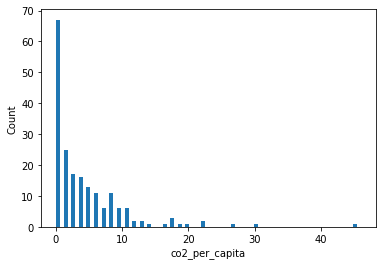

In [16]:
plt.hist(df.co2_per_capita, bins=40, width=0.6)

plt.xlabel('co2_per_capita')

plt.ylabel('Count')


plt.show()

In [17]:

df = df.loc[df["co2_per_capita"] >= 2.50]


In [18]:
df.describe().applymap('{:,.2f}'.format)

,co2_per_capita,coal_co2_per_capita,oil_co2_per_capita,co2_per_gdp,consumption_co2_per_capita,ghg_per_capita,ghg_excluding_lucf_per_capita,methane_per_capita,nitrous_oxide_per_capita,energy_per_capita,energy_per_gdp
count,96.00,72.00,96.00,83.00,68.00,94.00,94.00,94.00,94.00,93.00,83.00
mean,8.54,2.28,3.70,0.38,10.74,11.27,11.18,2.30,0.59,"45,612.28",1.90
std,6.63,2.39,2.70,0.20,6.39,8.56,7.78,3.70,0.69,"39,017.56",0.96
min,2.54,0.00,0.46,0.10,3.56,1.39,3.24,0.00,0.00,"8,258.49",0.67
25%,4.38,0.30,1.96,0.25,6.29,5.72,6.32,0.81,0.26,"20,006.30",1.28
50%,6.46,1.58,3.31,0.31,9.21,8.40,8.31,1.16,0.40,"33,360.09",1.67
75%,10.06,3.42,4.32,0.45,13.16,13.52,12.71,1.85,0.59,"53,858.02",2.25
max,45.97,8.96,16.13,1.17,36.35,47.54,45.17,28.12,3.66,"212,107.76",6.86


In [19]:
df.isnull().sum()

co2_per_capita                    0
coal_co2_per_capita              24
oil_co2_per_capita                0
co2_per_gdp                      13
consumption_co2_per_capita       28
ghg_per_capita                    2
ghg_excluding_lucf_per_capita     2
methane_per_capita                2
nitrous_oxide_per_capita          2
energy_per_capita                 3
energy_per_gdp                   13
dtype: int64

In [20]:
for col in df.columns[df.isnull().any()]:
        df[col].fillna(df[col].mean(), inplace = True)

## Leaders in Per Capita CO2 Emissions


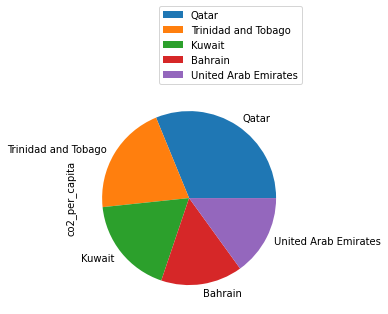

In [21]:
df.groupby("country")[["co2_per_capita"]].mean().sort_values(ascending=False,by="co2_per_capita").head().plot(kind="pie",subplots=True)
plt.legend(bbox_to_anchor=(1.04,1),loc="lower right")

### Result: Oil-producing countries in the Middle East are the highest emitters of CO2 on a per capita basis